<a href="https://colab.research.google.com/github/ignaciomorenobarria21-a11y/Examen_Python/blob/main/Examen_Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio 1: Modularización y Funciones

# finanzas_utils.py

In [ ]:
def calcular_retorno_diario(precio_actual, precio_anterior):
    """
    Calcula el porcentaje de cambio entre dos precios.
    """
    retorno = ((precio_actual - precio_anterior) / precio_anterior) * 100
    return retorno

def categorizar_volatilidad(desviacion_estandar):
    """
    Clasifica la volatilidad según el porcentaje de la desviación estándar.
    """
    if desviacion_estandar < 2:
        return "Baja"
    elif 2 <= desviacion_estandar <= 5:
        return "Media"
    else:
        return "Alta"

##Ejercicio 2: Importación y Uso de Módulos

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import finanzas_utils as utils
from datetime import datetime

In [ ]:
import yfinance as yf
import pandas as pd
import finanzas_utils as utils
# 1.
t1 = input("Ticker 1 (AAPL): ").upper()
t2 = input("Ticker 2 (MSFT): ").upper()

# 2.
d1 = yf.download(t1, start="2023-01-01")
d2 = yf.download(t2, start="2023-01-01")

# 3
precio_hoy1 = d1['Close'].iloc[-1].item()
precio_ayer1 = d1['Close'].iloc[-2].item()

precio_hoy2 = d2['Close'].iloc[-1].item()
precio_ayer2 = d2['Close'].iloc[-2].item()

# 4.
ret1 = utils.calcular_retorno_diario(precio_hoy1, precio_ayer1)
ret2 = utils.calcular_retorno_diario(precio_hoy2, precio_ayer2)

vol1 = d1['Close'].pct_change().std().item() * 100
vol2 = d2['Close'].pct_change().std().item() * 100

# 5.
print(f"\n--- Resultados ---")
print(f"{t1}: Retorno hoy {ret1:.2f}% | Volatilidad: {utils.categorizar_volatilidad(vol1)} ({vol1:.2f}%)")
print(f"{t2}: Retorno hoy {ret2:.2f}% | Volatilidad: {utils.categorizar_volatilidad(vol2)} ({vol2:.2f}%)")

Ticker 1 (AAPL): AAPL
Ticker 2 (MSFT): MSFT


/tmp/ipython-input-3313453537.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  d1 = yf.download(t1, start="2023-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3313453537.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  d2 = yf.download(t2, start="2023-01-01")
[*********************100%***********************]  1 of 1 completed



--- Resultados ---
AAPL: Retorno hoy 0.54% | Volatilidad: Baja (1.62%)
MSFT: Retorno hoy 0.40% | Volatilidad: Baja (1.47%)


##Ejercicio 3: Análisis Técnico y Visualización

/tmp/ipython-input-1009378907.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01")
[*********************100%***********************]  1 of 1 completed


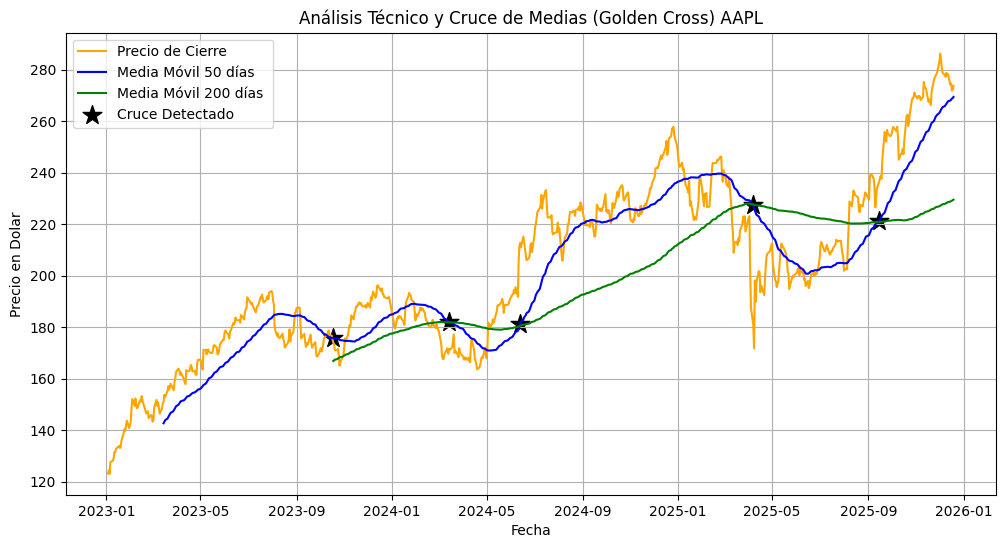

Fechas y precios donde se calculó un cruce:
Price            Close       SMA50      SMA200
Ticker            AAPL                        
Date                                          
2023-10-18  173.965714  175.809057  166.934813
2024-03-14  171.600174  181.909986  181.965385
2024-06-13  212.794724  181.133787  180.647292
2025-04-07  180.841614  227.365226  227.694421
2025-09-15  236.470764  221.254478  220.885395


In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf

# 1.
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01")

# 2.
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# 3.
data['Signal'] = data['SMA50'] > data['SMA200']
data['Cruce'] = data['Signal'].diff()

puntos_cruce = data[data['Cruce'] == True]

# 4.
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Precio de Cierre', color='orange')
plt.plot(data['SMA50'], label='Media Móvil 50 días ', color='blue')
plt.plot(data['SMA200'], label='Media Móvil 200 días ', color='green')


plt.scatter(puntos_cruce.index, puntos_cruce['SMA50'], color='black', marker='*', s=200, label='Cruce Detectado')

plt.title(f"Análisis Técnico y Cruce de Medias (Golden Cross) AAPL")
plt.xlabel("Fecha")
plt.ylabel("Precio en Dolar")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los puntos calculados por pantalla
print("Fechas y precios donde se calculó un cruce:")
print(puntos_cruce[['Close', 'SMA50', 'SMA200']])

##Ejercicio 4 Análisis de Series Temporales

Se han generado Ticker
AAPL    333
dtype: int64 valores nulos (NaN) en la columna de precios.
Muestra de datos rellenados (fines de semana):
Price            Close
Ticker            AAPL
2023-01-03  123.211205
2023-01-04  124.482025
2023-01-05  123.161949
2023-01-06  127.693581
2023-01-07  127.693581
2023-01-08  127.693581
2023-01-09  128.215683
2023-01-10  128.787109
2023-01-11  131.506104
2023-01-12  131.427261


/tmp/ipython-input-3088206616.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_final['Close'].resample('M').mean()


<Figure size 1000x600 with 0 Axes>

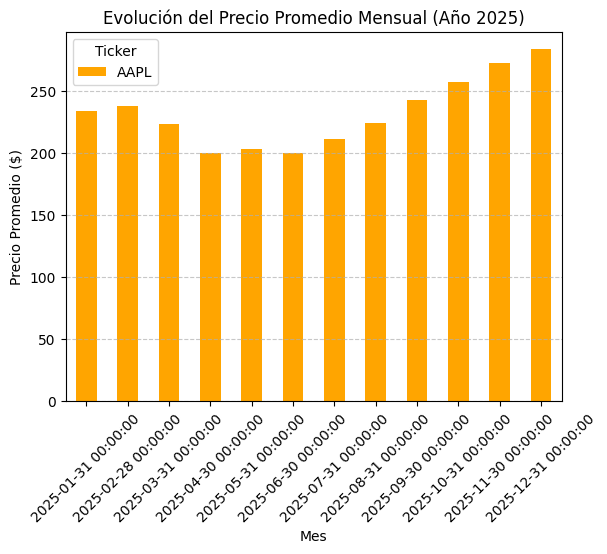

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.
fecha_inicio = df_grafico.index.min()
fecha_fin = "2025-12-01"
rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')
df_reindexed = df_grafico.reindex(rango_completo)

# 2.
nulos_generados = df_reindexed['Close'].isnull().sum()
print(f"Se han generado {nulos_generados} valores nulos (NaN) en la columna de precios.")

# 3.
df_final = df_reindexed.copy()
df_final['Close'] = df_final['Close'].ffill()
print("Muestra de datos rellenados (fines de semana):")
print(df_final[['Close']].head(10))

# 4.
df_mensual = df_final['Close'].resample('M').mean()

# 5.
precio_2025 = df_mensual[df_mensual.index.year == 2025]

plt.figure(figsize=(10, 6))
precio_2025.plot(kind='bar', color='orange')

plt.title("Evolución del Precio Promedio Mensual (Año 2025)")
plt.xlabel("Mes")
plt.ylabel("Precio Promedio ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##Ejercicio 5: Web Scraping Automático

In [21]:
import pandas as pd
import requests
import io

# 1.
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# 2.
headers = {'User-Agent': 'Mozilla/5.0'}
respuesta = requests.get(url, headers=headers)

# 3.
tablas = pd.read_html(io.StringIO(respuesta.text))
# 4.
df_companias = tablas[0]  #  empresas actuales
df_cambios = tablas[1]    #  tabla de entradas y salidas

# 5.
df_companias.to_csv("sp500_componentes.csv", index=False)
df_cambios.to_csv("sp500_cambios.csv", index=False)
print("Archivos CSV generados con éxito.")




Archivos CSV generados con éxito.


In [22]:
import pandas as pd

# 1. Leemos el archivo de componentes que ya creaste
df_comp = pd.read_csv("sp500_componentes.csv")

# 2. Empresa más antigua (Punto 59)
# Convertimos la columna de fecha para poder ordenarla
df_comp['Date added'] = pd.to_datetime(df_comp['Date added'], errors='coerce')
mas_antigua = df_comp.sort_values('Date added').iloc[0]

print(f"--- RESULTADOS FINALES ---")
print(f"La empresa más antigua en el índice es: {mas_antigua['Security']}")
print(f"Fue añadida el: {mas_antigua['Date added'].date()}")

# 3. Empresa con más movimiento (Punto 60)
# Leemos el archivo de cambios
df_cambios = pd.read_csv("sp500_cambios.csv")

# Contamos cuántas veces aparece cada empresa en la columna 'Added'
# Nota: Si el archivo se guardó con nombres de columnas raros, esto lo corrige:
ticker_mas_entradas = df_cambios.iloc[:, 1].value_counts().idxmax()

print(f"La empresa que más veces ha entrado/salido es: {ticker_mas_entradas}")

--- RESULTADOS FINALES ---
La empresa más antigua en el índice es: 3M
Fue añadida el: 1957-03-04
La empresa que más veces ha entrado/salido es: FOX
